In [45]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df=pd.read_csv("master.csv")

In [47]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [49]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


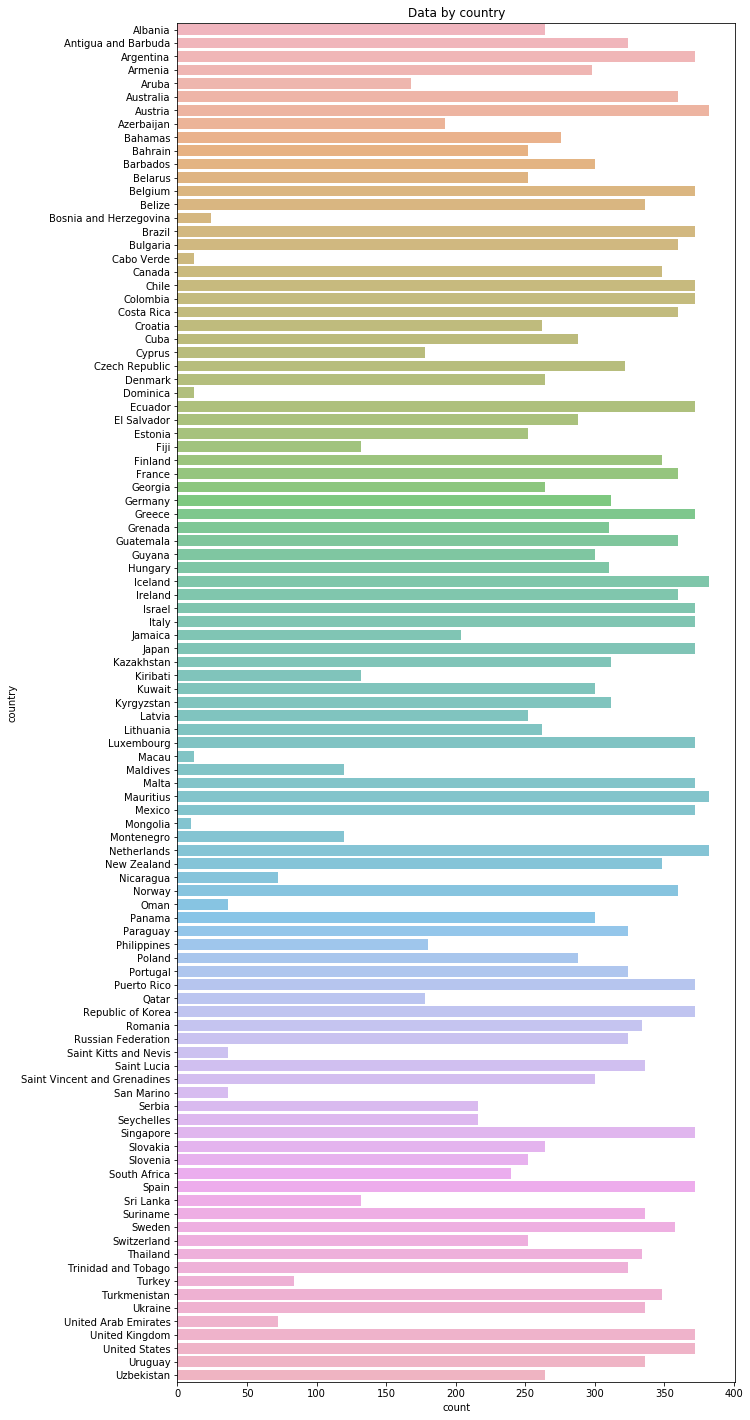

In [50]:
alpha = 0.7
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=df, alpha=alpha)
plt.title('Data by country')
plt.show()

In [51]:
df.sort_values(by= 'country', ascending=False)[['country','suicides/100k pop','year']].head(5)

,country,suicides/100k pop,year
27819,Uzbekistan,1.46,2014
27638,Uzbekistan,1.30,1996
27652,Uzbekistan,22.30,1998
27651,Uzbekistan,0.29,1997
27650,Uzbekistan,1.17,1997


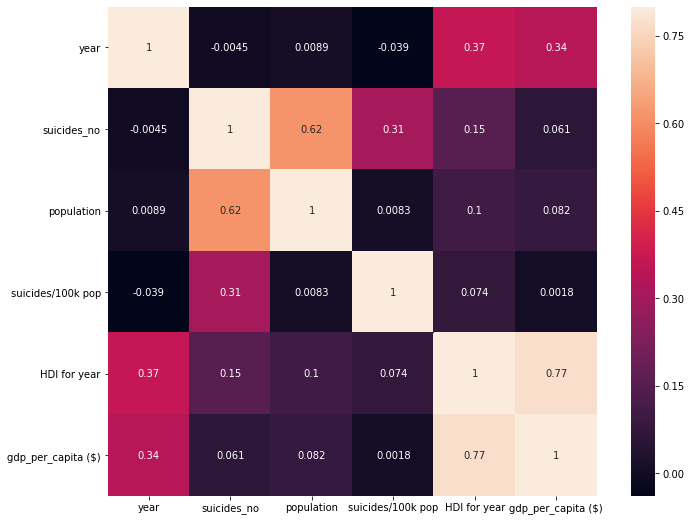

In [52]:
corrmat=df.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, square= True,annot=True)
plt.show()

In [53]:
col = ['year', 'population',
       'suicides/100k pop',
        'gdp_per_capita ($)']
X = df[col]
y = df['suicides_no']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [59]:
cm

array([[1031,    0,    0, ...,    0,    0,    0],
       [   0,  423,    2, ...,    0,    0,    0],
       [   0,    7,  245, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    1,    0]])

<Figure size 432x288 with 0 Axes>

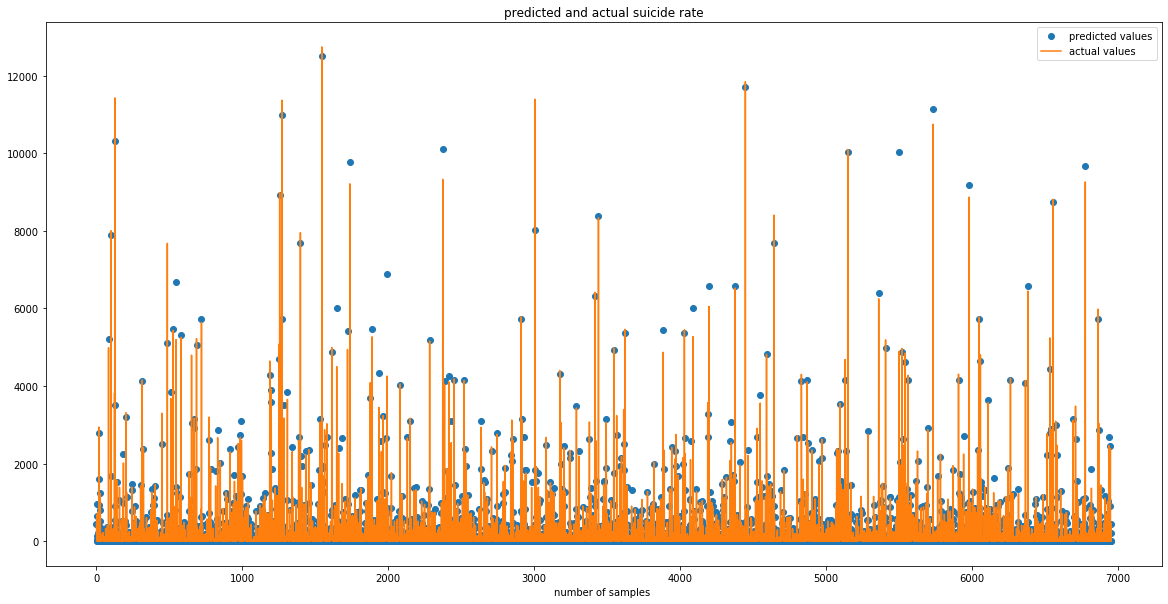

In [60]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.figure(figsize = (20,10))
plt.plot(np.arange(len(y_pred)),y_pred, 'o', label = "predicted values")
plt.title('predicted and actual suicide rate')
plt.xlabel("number of samples ")
#plt.figure(2)
plt.plot(np.arange(len(y_pred)),y_test.values, label = "actual values")
plt.legend(loc = 'best')

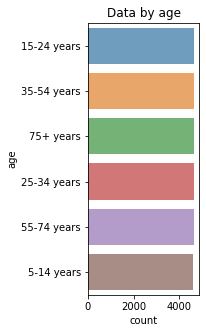

In [61]:
alpha = 0.7
plt.figure(figsize=(2,5))
sns.countplot(y='age', data=df, alpha=alpha)
plt.title('Data by age')
plt.show()

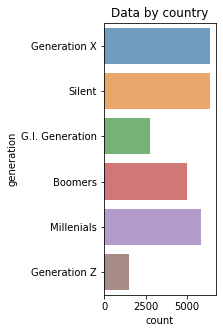

In [62]:
alpha = 0.7
plt.figure(figsize=(2,5))
sns.countplot(y='generation', data=df, alpha=alpha)
plt.title('Data by country')
plt.show()

In [63]:
country_yearly =df.groupby('country-year')['suicides_no'].sum()
country_yearly.sort_values(ascending=False).head(5)

country-year
Russian Federation1994    61420
Russian Federation1995    60548
Russian Federation1996    57511
Russian Federation1999    56974
Russian Federation2001    56958
Name: suicides_no, dtype: int64

In [64]:
df.groupby('country').count()

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
country,,,,,,,,,,,
Albania,264,264,264,264,264,264,264,48,264,264,264
Antigua and Barbuda,324,324,324,324,324,324,324,36,324,324,324
Argentina,372,372,372,372,372,372,372,120,372,372,372
Armenia,298,298,298,298,298,298,298,96,298,298,298
Aruba,168,168,168,168,168,168,168,0,168,168,168
Australia,360,360,360,360,360,360,360,96,360,360,360
Austria,382,382,382,382,382,382,382,120,382,382,382
Azerbaijan,192,192,192,192,192,192,192,24,192,192,192
Bahamas,276,276,276,276,276,276,276,72,276,276,276


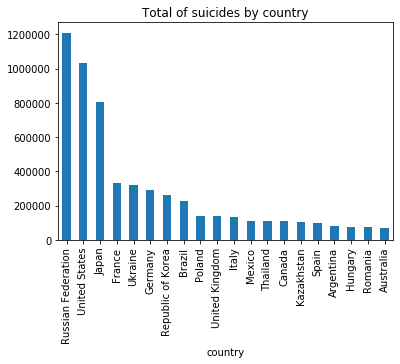

In [75]:
country_total =df.groupby('country')['suicides_no'].sum()
country_total.sort_values(ascending=False).head(20).plot(y='suicides_no', kind='bar', title='Total of suicides by country');

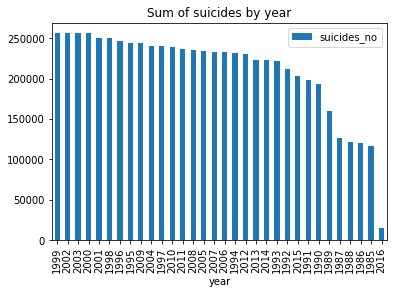

In [81]:
df.groupby('year').sum().sort_values(by='suicides_no', ascending=False).plot(kind='bar', y='suicides_no', title='Sum of suicides by year')